In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path =  '/Users/aleksandrakukula/Documents/ML_intro/Loan_Default.csv'
df = pd.read_csv(file_path)

In [3]:
df.shape

(148670, 34)

In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.describe(include='all')

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,...,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,...,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,...,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


In [7]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                         

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type           

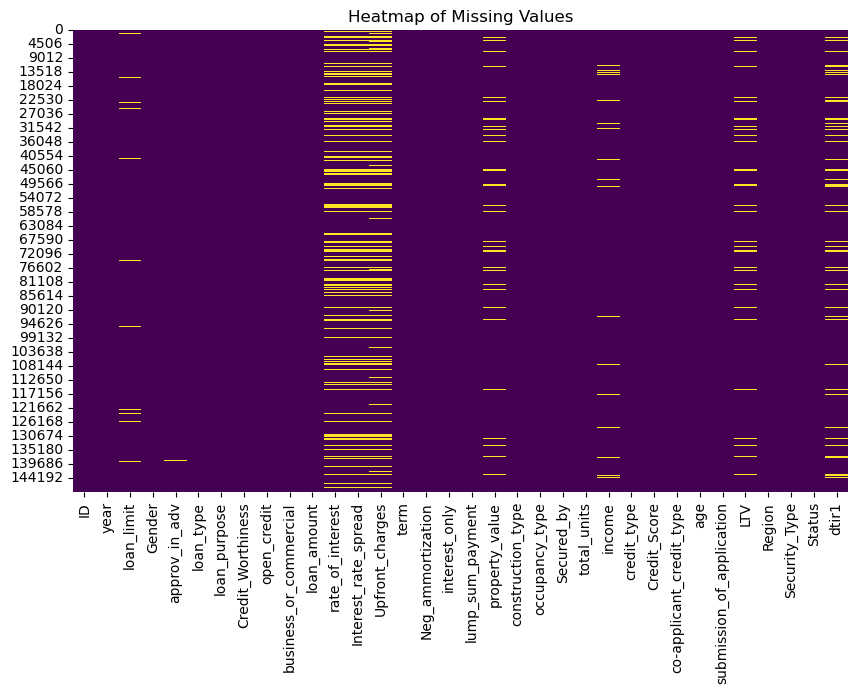

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [10]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

Rows with missing values:
            ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
3        24893  2019         cf               Male         nopre     type1   
7        24897  2019        NaN             Female         nopre     type1   
10       24900  2019         cf               Male         nopre     type2   
...        ...   ...        ...                ...           ...       ...   
148651  173541  2019         cf              Joint         nopre     type3   
148652  173542  2019         cf               Male         nopre     type1   
148658  173548  2019         cf  Sex Not Available         nopre     type1   
148661  173551  2019         cf  Sex Not Available         nopre     type2   
148663  173553  2019         cf               Male         nopre     type2   

       loan_purpose Credit_Worthiness

In [11]:
grouped_data = df.groupby('Region').agg({
    'loan_amount': 'mean',
    'income': 'mean'
}).reset_index()

In [12]:
grouped_data.rename(columns={'loan_amount': 'Average Loan Amount', 'income': 'Average Income'}, inplace=True)

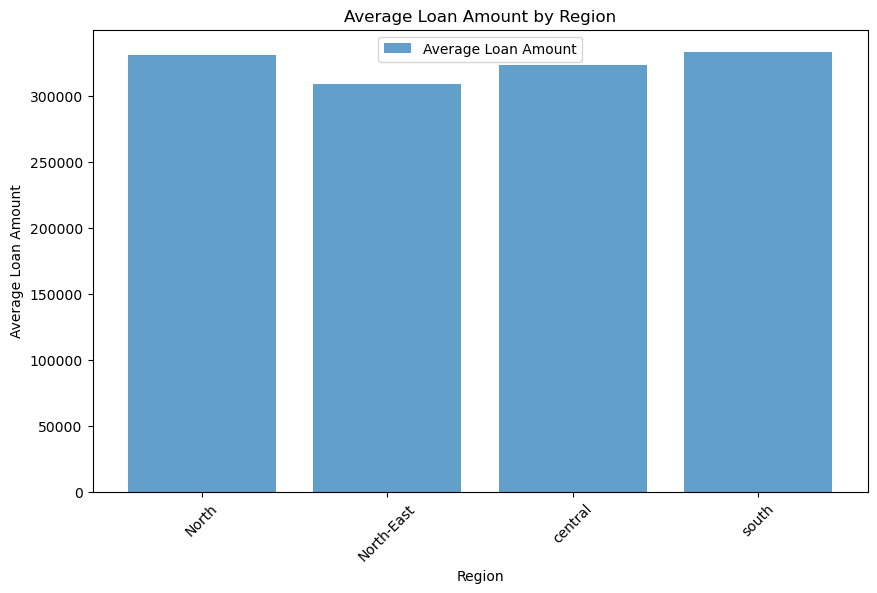

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Region'], grouped_data['Average Loan Amount'], alpha=0.7, label='Average Loan Amount')
plt.xlabel('Region')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()

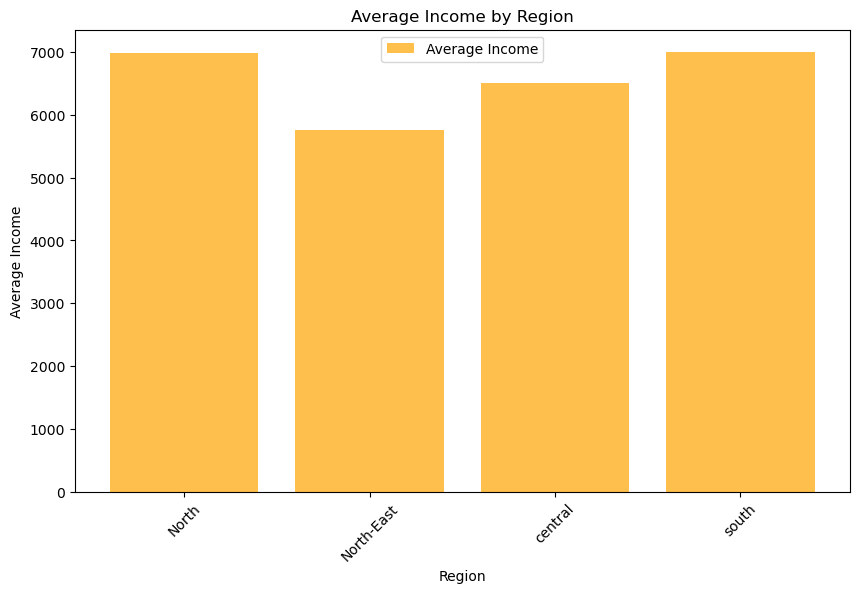

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Region'], grouped_data['Average Income'], alpha=0.7, color='orange', label='Average Income')
plt.xlabel('Region')
plt.ylabel('Average Income')
plt.title('Average Income by Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
print(grouped_data)

       Region  Average Loan Amount  Average Income
0       North        330528.264768     6987.669523
1  North-East        309058.704453     5753.066898
2     central        323096.527538     6510.235985
3       south        333321.107223     7004.591100


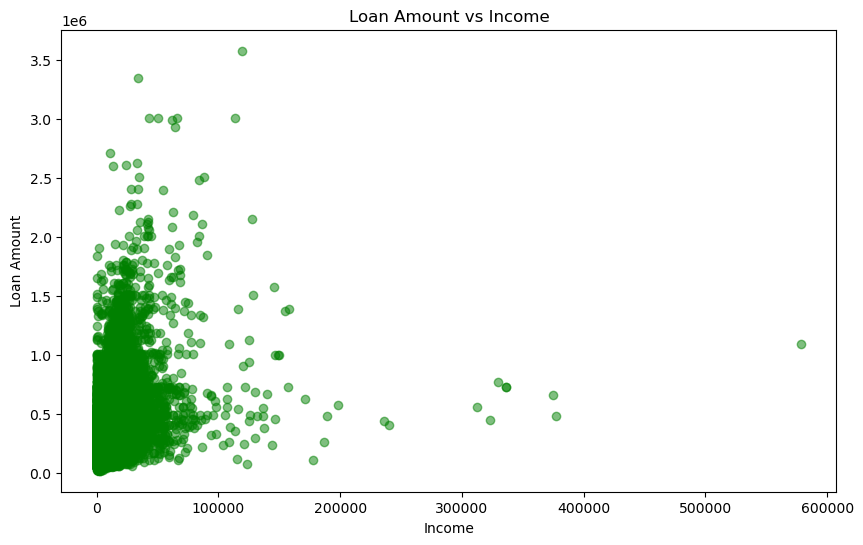

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['loan_amount'], alpha=0.5, color='green')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income')
plt.show()

<Figure size 1000x600 with 0 Axes>

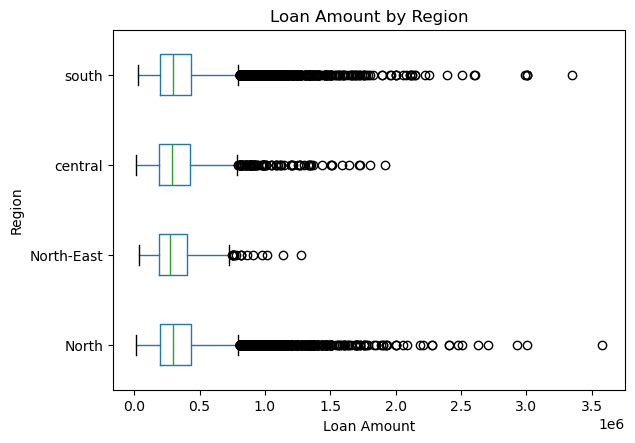

In [17]:
plt.figure(figsize=(10, 6))
df.boxplot(column='loan_amount', by='Region', grid=False, vert=False)
plt.xlabel('Loan Amount')
plt.title('Loan Amount by Region')
plt.suptitle('')  # Remove automatic suptitle from boxplot
plt.show()

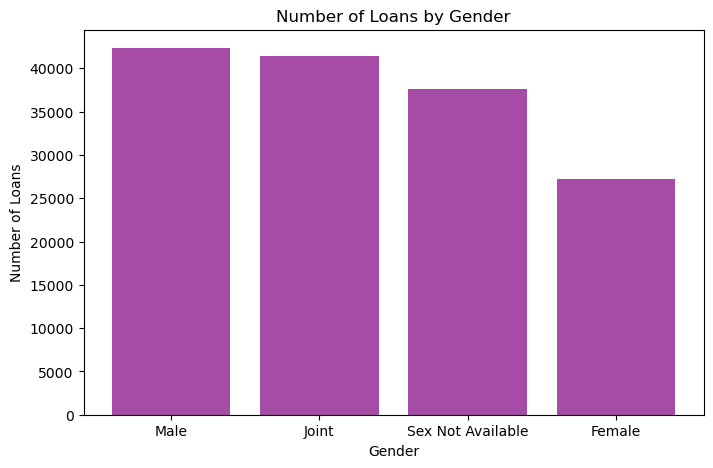

In [18]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color='purple', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Gender')
plt.show()